# StereoExpData Based on AnnData

`AnnData` is widely used in bioinformatic software because of its proper design and efficient functions.

Further information at [AnnData Docs](https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)

## AnnBasedStereoExpData

To meet the needs of more users, we integrate `AnnData` functionality into `StereoExpData` through adapter mode.

Read a `.h5ad` file into `AnnBasedStereoExpData`.

In [70]:
import sys
sys.path.insert(0, "/mnt/d/projects/stereopy_dev/stereopy/")
from stereo.core.stereo_exp_data import AnnBasedStereoExpData

data = AnnBasedStereoExpData("./SS200000135TL_D1_script_res_gem.h5ad")

Show `AnnData` infomation.

In [71]:
data._ann_data

AnnData object with n_obs × n_vars = 2316 × 25523
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

And we automatically index `data.exp_matrix` to `data._ann_data.X`, which means you can read a `.h5ad` file and use it as `StereoExpData`.

In [72]:
data.exp_matrix is data._ann_data.X

True

## Supported StereoExpData Features

* exp_matrix(_ann_data.X)
* postion
* cells(_ann_data.obs)
* genes(_ann_data.var)

## Supported StereoExpData Functions

Most tools and plot functions are supported.

In [73]:
data.tl.cal_qc()
data.tl.raw_checkpoint()
data.tl.normalize_total(target_sum=1e4)
data.tl.log1p()
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3, min_disp=0.5, res_key='highly_variable_genes', n_top_genes=None)
data.tl.pca(use_highly_genes=True, hvg_res_key='highly_variable_genes', n_pcs=20, res_key='pca_test', svd_solver='arpack')
data.tl.neighbors(pca_res_key='pca_test', n_pcs=30, res_key='neighbors_test', n_jobs=8)
data.tl.umap(pca_res_key='pca_test', neighbors_res_key='neighbors_test', res_key='umap_test', init_pos='spectral')
data.tl.leiden(neighbors_res_key='neighbors_test', res_key='leiden_test')

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


See self-define results written to '_ann_data'. 

In [74]:
data._ann_data

AnnData object with n_obs × n_vars = 2316 × 25523
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_test'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'highly_variable_genes', 'pca_test', 'neighbors_test', 'umap_test', 'leiden_test'
    obsm: 'X_pca', 'X_umap', 'spatial', 'X_pca_test', 'X_umap_test'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_test_connectivities', 'neighbors_test_distances'

Gets a new column `leiden_test` after `leiden`, and can show it through `_ann_data.obs` or `cells`.

In [75]:
data._ann_data.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_test
16-47,2331,9597.581055,142.0,0.471203,6,8
16-48,4612,11983.083984,685.0,0.469797,6,3
16-49,803,5191.250488,45.0,0.819007,6,8
17-47,3352,11328.244141,268.0,0.388805,6,8
17-48,5657,12873.247070,828.0,0.441474,6,3
...,...,...,...,...,...,...
67-55,791,5382.013184,63.0,0.955790,6,8
67-56,821,5625.035645,42.0,0.766030,6,8
67-57,820,5590.018555,37.0,0.840400,6,8
67-58,238,2333.927246,5.0,1.337509,6,8


Plot the umap and leiden results.

<AxesSubplot:title={'center':'leiden_test'}, xlabel='umap1', ylabel='umap2'>

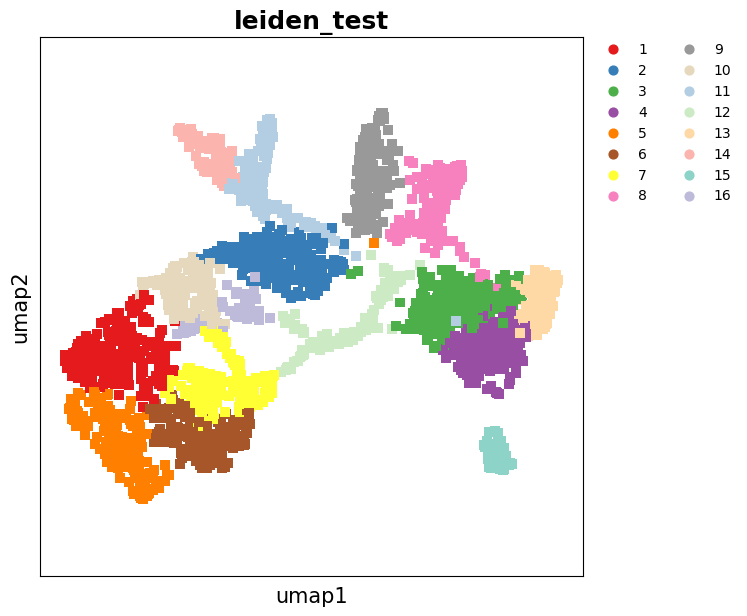

In [76]:
data.plt.umap(res_key='umap_test', cluster_key='leiden_test')

## Leiden by Using Result in `.h5ad`

Glancing at `data._ann_data`, we find `neighbors` in uns that are produced by other software. We can use it as input to the `leiden` method.

In [77]:
data._ann_data

AnnData object with n_obs × n_vars = 2316 × 25523
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_test'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'highly_variable_genes', 'pca_test', 'neighbors_test', 'umap_test', 'leiden_test'
    obsm: 'X_pca', 'X_umap', 'spatial', 'X_pca_test', 'X_umap_test'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_test_connectivities', 'neighbors_test_distances'

In [78]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden_new')

In [79]:
data._ann_data.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_test,leiden_new
16-47,2331,9597.581055,142.0,0.471203,6,8,7
16-48,4612,11983.083984,685.0,0.469797,6,3,7
16-49,803,5191.250488,45.0,0.819007,6,8,7
17-47,3352,11328.244141,268.0,0.388805,6,8,7
17-48,5657,12873.247070,828.0,0.441474,6,3,7
...,...,...,...,...,...,...,...
67-55,791,5382.013184,63.0,0.955790,6,8,7
67-56,821,5625.035645,42.0,0.766030,6,8,7
67-57,820,5590.018555,37.0,0.840400,6,8,7
67-58,238,2333.927246,5.0,1.337509,6,8,7


## Write to `.h5ad`

Use `AnnData`'s function `write_h5ad` to write `AnnBasedStereoExpData` to the `.h5ad` file.

In [80]:
data._ann_data.write_h5ad('./SS200000135TL_D1.stereo.h5ad')